In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import scipy.linalg

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "mathtext.fontset": "cm",
    "axes.unicode_minus": False,
    "text.latex.preamble": r"\usepackage{amsmath}",
})

def sparse_cmap():
    cmap = plt.cm.tab20
    return mcolors.ListedColormap(["white"] + [cmap(i) for i in range(cmap.N)])

def plot_vector(ax, v, extent, label, shape_text, cmap="tab20", grid=True):
    n = len(v)
    ax.imshow(v.reshape(n, 1), cmap=cmap, extent=extent, aspect="auto")
    cx = (extent[0] + extent[1]) / 2
    ax.text(cx, extent[3] + 1, label, fontsize=16, ha="center")
    ax.text(cx, extent[2] - 1.2, shape_text, fontsize=12, ha="center")
    if grid:
        for i in range(n+1):
            ax.plot([extent[0], extent[1]], [extent[2] + i, extent[2] + i], color="black", lw=0.5)
    ax.plot([extent[0], extent[1], extent[1], extent[0], extent[0]],
            [extent[2], extent[2], extent[3], extent[3], extent[2]], color="black", lw=1.0)

def plot_matrix(ax, M, extent, label, shape_text, cmap="nipy_spectral", norm=None, draw=True):
    if draw:
        ax.imshow(M, cmap=cmap, extent=extent, aspect="auto", norm=norm)
    cx = (extent[0] + extent[1]) / 2
    ax.text(cx, extent[3] + 1, label, fontsize=16, ha="center")
    ax.text(cx, extent[2] - 1.2, shape_text, fontsize=12, ha="center")
    ax.plot([extent[0], extent[1], extent[1], extent[0], extent[0]],
            [extent[2], extent[2], extent[3], extent[3], extent[2]], color="black", lw=1.0)

def plot_equals(ax, x, y):
    ax.text(x, y, "=", fontsize=20, ha="center", va="center")


In [5]:
n = 16      # full dimension
r = 5       # reduced modes
m = 6       # sensors

# Random POD-like basis
U, _, _ = np.linalg.svd(np.random.randn(n, n))
Psi_r = U[:, :r]   # n x r

# Coefficients and signal
a = np.array([2, -1, 3, 0.5, 1])
X = Psi_r @ a

# QR pivoting
Q, R, P = scipy.linalg.qr(Psi_r.T, pivoting=True)
sensor_idx = P[:m]

# Selection matrix
C_opt = np.zeros((m, n))
C_opt[np.arange(m), sensor_idx] = 1

# Measurement
Y = C_opt @ X
Theta = C_opt @ Psi_r


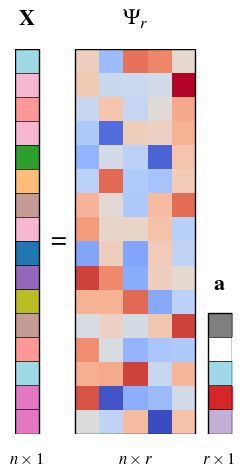

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
plot_vector(ax, X, [0,1,0,n], r"$\mathbf{X}$", rf"$n \times 1$")
plot_equals(ax, 1.8, n/2)
plot_matrix(ax, Psi_r, [2.5, 2.5+r, 0,n],
            r"$\boldsymbol{\Psi}_r$", rf"$n \times r$", cmap="coolwarm")
plot_vector(ax, a, [3+r, 3+r+1, 0,r],
            r"$\mathbf{a}$", rf"$r \times 1$", cmap=sparse_cmap())
ax.axis("off"); ax.set_aspect("equal")
plt.show()


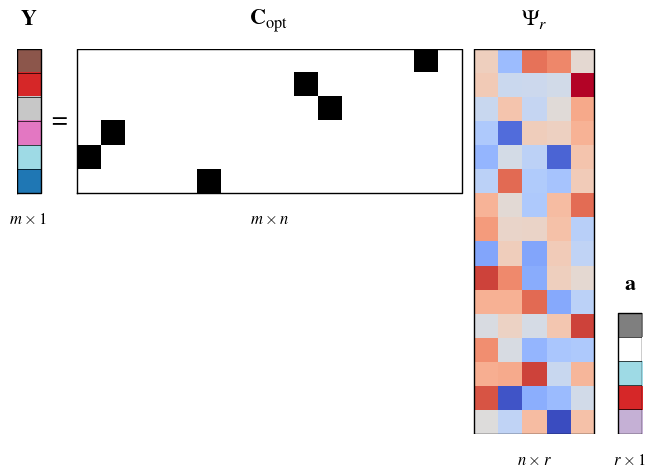

In [7]:
fig, ax = plt.subplots(figsize=(14,5))
plot_vector(ax, Y, [0,1,n-m,n], r"$\mathbf{Y}$", rf"$m \times 1$")
plot_equals(ax, 1.8, n-m/2)
plot_matrix(ax, C_opt, [2.5, 2.5+n, n-m, n],
            r"$\mathbf{C}_{\text{opt}}$", rf"$m \times n$", cmap="Greys")
plot_matrix(ax, Psi_r, [3+n, 3+n+r, 0,n],
            r"$\boldsymbol{\Psi}_r$", rf"$n \times r$", cmap="coolwarm")
plot_vector(ax, a, [4+n+r, 4+n+r+1, 0,r],
            r"$\mathbf{a}$", rf"$r \times 1$", cmap=sparse_cmap())
ax.axis("off"); ax.set_aspect("equal")
plt.show()


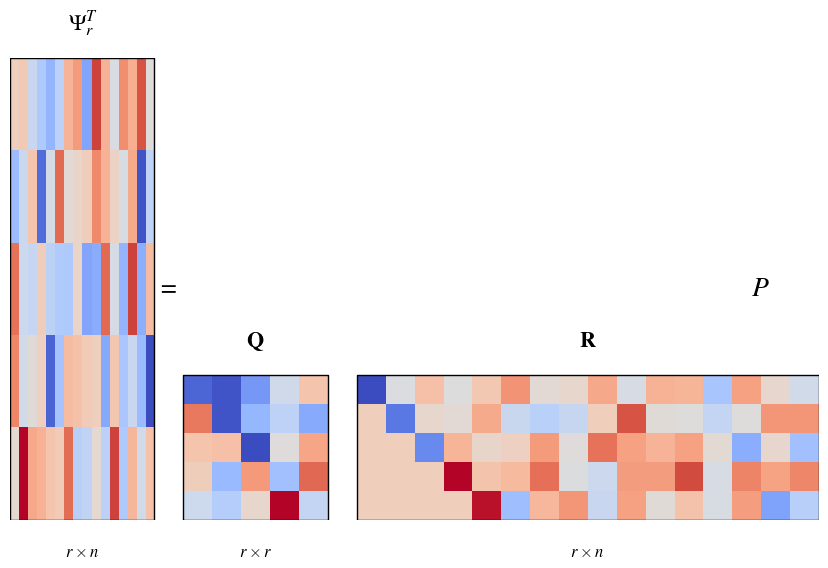

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
plot_matrix(ax, Psi_r.T, [0, r, 0, n], r"$\boldsymbol{\Psi}_r^T$", rf"$r \times n$", cmap="coolwarm")
plot_equals(ax, r+0.5, n/2)

plot_matrix(ax, Q, [r+1, r+1+r, 0, r], r"$\mathbf{Q}$", rf"$r \times r$", cmap="coolwarm")
plot_matrix(ax, R, [2*r+2, 2*r+2+n, 0, r], r"$\mathbf{R}$", rf"$r \times n$", cmap="coolwarm")
ax.text(3*r+3+n/2, n/2, r"$P$", fontsize=20, ha="center", va="center")

ax.axis("off"); ax.set_aspect("equal")
plt.show()
